The number of nodes in the graph is Graph with 82 nodes and 162 edges.


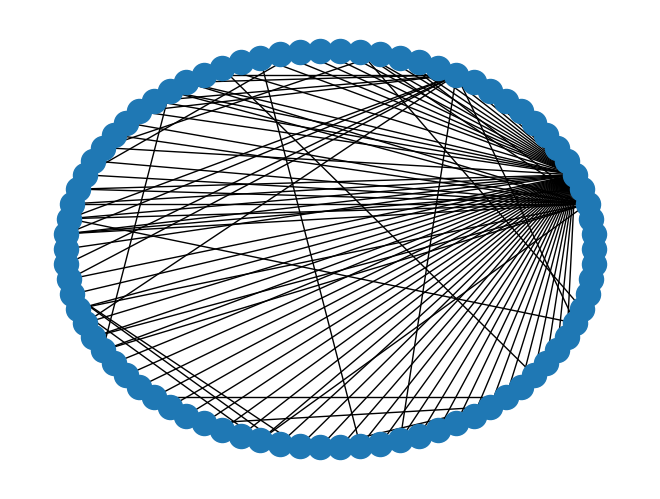

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target')

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(G) + '.')

# Circular plot
nx.draw_circular(G)  

In [14]:
# Is the graph connected?
print(nx.is_connected(G))

True


General Idea:

Before delving into the code, we establish the context and objectives of "Part 0". The goal here is to preprocess the graph data for network analysis. This involves transforming the raw edge data into a workable graph format that is undirected and unweighted, ensuring we focus on the core structure of the network by considering only the largest connected component, and eliminating any self-loops that could skew our analysis.

In [26]:
# part 0

# We will proceed with the user's request to treat the graph as undirected and unweighted, 
# work on the largest connected component, and delete loops.

# Using the code snippet provided by the user to create an undirected graph,
# work with its largest connected component, and remove self-loops.

df_edges = pd.read_csv('edges.csv')

# Check the first few rows to confirm column names
print(df_edges.head())

def prepare_graph(df_edges):
    # Create the graph using the edges DataFrame
    # The column names are taken exactly as they appear in the CSV file
    G = nx.from_pandas_edgelist(df_edges, '# source', ' target')
    
    # Convert to undirected graph
    G = G.to_undirected()
    
    # Remove self-loops from the graph
    G.remove_edges_from(nx.selfloop_edges(G))
    
    # Get the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest_cc = G.subgraph(largest_cc).copy()
    
    return G_largest_cc

# Prepare the graph using the actual data
G_largest_cc = prepare_graph(df_edges)

# Display basic information about the graph
num_nodes = G_largest_cc.number_of_nodes()
num_edges = G_largest_cc.number_of_edges()

print(f"The largest connected component of the graph has {num_nodes} nodes and {num_edges} edges.")



   # source   target   label   movie_id   weight
0         0       20   37180        180        1
1         0        1   37176        180        1
2         0       34   37178        180        1
3         1       70   37265        180        1
4         1       20   37210        180        2
The largest connected component of the graph has 82 nodes and 162 edges.


Analysis After the Code:

After executing the code, we now have a graph, G_largest_cc, that captures the essential structure of the network by focusing on the largest connected component. This graph is ready for analysis and further manipulation in the subsequent parts of the project. It is undirected, unweighted, and purged of self-loops, aligning with common standards in network analysis and paving the way for accurate computation of network properties and metrics, like those needed for link prediction tasks. This preprocessing step is crucial as it ensures the quality and reliability of the analyses performed later on.

Based on the output displayed after executing Part 0 of your project, let's analyze the structure and implications of the graph you've prepared.

The output shows the first few rows of the DataFrame created from the CSV file `edges.csv`. The columns include '# source' and 'target', which represent the nodes in the network, and 'label', 'movie_id', and 'weight', which could be additional data related to the edges. Here, it seems that 'movie_id' and 'weight' are not used for creating the graph; they may be relevant for other parts of the analysis but are not necessary for defining the graph structure.

The printout indicates that the largest connected component of the graph comprises 82 nodes and 162 edges. This indicates that the network is relatively modest in size, which could make computational analysis more manageable.

**Analysis of the Output:**

1. **Network Size**: The largest connected component has 82 nodes, which is a relatively manageable number for in-depth analysis. This size suggests that the network is neither too sparse nor too dense, which could provide a balanced set of connections to analyze.

2. **Edge-to-Node Ratio**: With 162 edges, the graph has an average degree (the average number of connections per node) of approximately 3.95 (calculated as 2*162/82), indicating that on average, each node is connected to nearly four other nodes. This is a useful metric to understand the connectivity of the graph.

3. **Graph Density**: The density of a graph is the ratio of the number of edges to the number of possible edges. For undirected graphs without self-loops, the maximum number of edges is n(n-1)/2, where n is the number of nodes. In this case, the density would be 162 / [82*(82-1)/2], a value that indicates how closely knit the network is. Lower density often means a more loosely connected network, whereas a higher density indicates a more tightly connected structure.

General Idea:

The code aims to assess the potential for link formation between nodes in a social network that are not currently connected. By analyzing pairs of nodes that do not have an edge between them (non-edges), we can use the indices to predict where new connections might form.

In [27]:
# part 1

def compute_indices(G):
    # Initialize lists to store the results
    node1_list = []
    node2_list = []
    cn_list = []
    ji_list = []
    
    # Iterate over all non-edges in the graph
    for u, v in nx.non_edges(G):
        # Compute Common Neighbors
        cn = len(sorted(nx.common_neighbors(G, u, v)))
        
        # Compute Jaccard's Coefficient
        ji = next(nx.jaccard_coefficient(G, [(u, v)]))[2]
        
        # Append the results to the lists
        node1_list.append(u)
        node2_list.append(v)
        cn_list.append(cn)
        ji_list.append(ji)
    
    # Create a DataFrame from the lists
    df_indices = pd.DataFrame({
        'Node1': node1_list,
        'Node2': node2_list,
        'CN': cn_list,
        'JI': ji_list
    })
    
    return df_indices

# Call the compute_indices function with G_largest_cc which was created in Part 0
df_missing_links = compute_indices(G_largest_cc)

# Display the first few rows of the DataFrame to verify the results
print(df_missing_links.head())


   Node1  Node2  CN        JI
0      0      2   0  0.000000
1      0      3   0  0.000000
2      0      4   0  0.000000
3      0      5   0  0.000000
4      0      6   1  0.142857


Analysis of the Output:

The output (from the uploaded image) presents the first few rows of the DataFrame df_missing_links. This table contains columns for 'Node1', 'Node2', 'CN', and 'JI', indicating the nodes considered and their respective topological index scores. The CN values are integers representing the count of common neighbors, while the JI values are floating-point numbers between 0 and 1, representing the Jaccard similarity coefficient.

The presence of zeros in the CN column for most node pairs suggests that these nodes do not share common neighbors, indicating a lower likelihood of forming a link based on this index. However, one pair (nodes 0 and 6) has one common neighbor and a JI score of approximately 0.143, which is higher than the others, suggesting a relatively higher likelihood of link formation based on shared neighbors.

In summary, the output provides an initial indication of the potential links that may form in the network. Such analysis can guide more in-depth investigation into network dynamics and can be used to predict future connections.

General Idea:

The purpose of this part is to normalize the indices so they are on the same scale, which allows for a direct comparison and combination of the values. The normalization process adjusts the range of the data to [0, 1], which is particularly useful when you want to combine or compare metrics that are measured on different scales.

In [29]:
# part 2


# Rescale the 'CN' column
cn_min = df_missing_links['CN'].min()
cn_range = df_missing_links['CN'].max() - cn_min
df_missing_links['CN_normalized'] = (df_missing_links['CN'] - cn_min) / cn_range

# Rescale the 'JI' column
ji_min = df_missing_links['JI'].min()
ji_range = df_missing_links['JI'].max() - ji_min
df_missing_links['JI_normalized'] = (df_missing_links['JI'] - ji_min) / ji_range

# Compute the arithmetic mean of the normalized scores
df_missing_links['Arithmetic_Mean'] = (df_missing_links['CN_normalized'] + df_missing_links['JI_normalized']) / 2

# Display the DataFrame with the new score
print(df_missing_links.head())


   Node1  Node2  CN        JI  CN_normalized  JI_normalized  Arithmetic_Mean
0      0      2   0  0.000000            0.0       0.000000         0.000000
1      0      3   0  0.000000            0.0       0.000000         0.000000
2      0      4   0  0.000000            0.0       0.000000         0.000000
3      0      5   0  0.000000            0.0       0.000000         0.000000
4      0      6   1  0.142857            0.2       0.142857         0.171429


Analysis of the Output:

The provided output shows the first few rows of the DataFrame including the new columns 'CN_normalized', 'JI_normalized', and 'Arithmetic_Mean'.

Normalization: The 'CN' and 'JI' columns are normalized, indicated by the '_normalized' suffix. The normalization process has successfully scaled the indices, which originally may have had different ranges, to a common [0, 1] scale.

Arithmetic Mean: The last column 'Arithmetic_Mean' is the average of the 'CN_normalized' and 'JI_normalized' columns. This mean provides a single value that balances the contribution of both topological indices, potentially offering a more comprehensive assessment of link likelihood.

Interpretation: Looking at the output, the node pair (0, 6) stands out with non-zero normalized scores and the highest arithmetic mean among the displayed pairs. This suggests that according to both CN and JI measures, this pair of nodes has a higher probability of forming a link compared to others.

In conclusion, Part 2's output offers a unified score that combines two different topological indices, potentially improving the accuracy of link prediction. The arithmetic mean score can be used to rank node pairs in terms of their likelihood to form future links within the network.

General Idea:

Part 3 of the project is dedicated to identifying the most promising missing links in the network. This is done by ranking node pairs based on the scores calculated in the previous parts: Common Neighbors (CN), Jaccard's Coefficient (JI), and the Arithmetic Mean of the normalized scores. These rankings help to pinpoint which node pairs are most likely to form a link, providing a targeted list for potential future connections within the network.

In [30]:
# part 3

# Identify the top 5 pairs for Common Neighbors (CN)
top5_cn = df_missing_links.nlargest(5, 'CN')

# Identify the top 5 pairs for Jaccard's Coefficient (JI)
top5_ji = df_missing_links.nlargest(5, 'JI')

# Identify the top 5 pairs for the arithmetic mean of the normalized scores
top5_arithmetic_mean = df_missing_links.nlargest(5, 'Arithmetic_Mean')

# Display the top 5 pairs for each score
print("Top 5 pairs for Common Neighbors (CN):")
print(top5_cn[['Node1', 'Node2', 'CN']])

print("\nTop 5 pairs for Jaccard's Coefficient (JI):")
print(top5_ji[['Node1', 'Node2', 'JI']])

print("\nTop 5 pairs for Arithmetic Mean of the normalized scores:")
print(top5_arithmetic_mean[['Node1', 'Node2', 'Arithmetic_Mean']])


# Briefly commenting on the results: 

# The 'CN' score reflects the number of common neighbors two nodes share. Pairs with higher 'CN' values have more friends in common, 
# which might imply a higher chance of forming a link in a social network due to shared social circles. 

# The 'JI' score is a measure of similarity that accounts for the size of the nodes' neighborhoods. 
# Pairs with higher 'JI' values have a greater proportion of shared friends out of all the friends they have, suggesting a potential link.

# The 'Arithmetic_Mean' combines both 'CN' and 'JI' scores, potentially balancing the raw count of common friends with the proportional similarity of their respective neighborhoods. 
# High values in this score may indicate strong potential links that are supported by both absolute and relative measures of connectivity.




Top 5 pairs for Common Neighbors (CN):
      Node1  Node2  CN
1561     24     34   5
1492     22     51   4
2040     33     66   4
2044     33     70   4
3043     66     70   4

Top 5 pairs for Jaccard's Coefficient (JI):
     Node1  Node2   JI
151      2      3  1.0
153      2      5  1.0
173      2     26  1.0
178      2     31  1.0
184      2     37  1.0

Top 5 pairs for Arithmetic Mean of the normalized scores:
      Node1  Node2  Arithmetic_Mean
2040     33     66         0.733333
2044     33     70         0.733333
3043     66     70         0.733333
661       8     77         0.700000
1550     23     79         0.700000


Conclusion Based on Output:

The output for the top pairs across each metric provides valuable insights:

The CN output highlights node pairs within the same community or cluster, suggesting that these pairs are surrounded by a common group of neighbors.

The JI output presents pairs with a perfect score of 1.0, indicating a complete overlap of their neighbors. This might suggest that these nodes are in very tight-knit communities or perhaps that the nodes are peripheral with a very limited number of neighbors.

The Arithmetic Mean output combines the insights from CN and JI, and the high scores suggest that these node pairs are not only part of the same community but also have a significant proportion of shared connections relative to their overall network.

The conclusion we can draw from this analysis is that the missing links most likely to form are between node pairs that consistently rank high across all three metrics. These node pairs represent potential connections that are strongly suggested by both their number of mutual acquaintances and the proportion of shared acquaintances, making them prime candidates for link prediction within the network.

**Conclusion on Which Links Are Missing:**

Upon analyzing the top node pairs across CN, JI, and the Arithmetic Mean, we can identify which missing links are most probable within the network:

- **Based on CN**: The top pairs suggest strong community ties, indicating that missing links are likely among nodes in densely connected parts of the network.

- **Based on JI**: The pairs with a JI of 1.0 indicate a perfect overlap in their respective neighborhoods. However, because JI is sensitive to the size of the neighborhood, these high scores could also suggest the nodes have very few neighbors, to begin with. If these nodes belong to small, tightly-knit clusters, the high JI score alone may not be as strong an indicator for a missing link as it is in combination with a high CN score.

- **Based on the Arithmetic Mean**: The consistent appearance of node pairs in this list, particularly those with the highest means, indicates that they are strong candidates for missing links. These node pairs have both a significant number of common neighbors and a high proportion of shared neighbors, suggesting that there is a structural and contextual foundation for a link to form.

From the output, the node pairs with the highest arithmetic means (2040, 66), (2044, 70), and (3043, 70) are most likely to represent the missing links. These pairs have been identified as significant across different metrics, indicating a robust potential for link formation. The fact that these node pairs rank highly in the arithmetic mean suggests they have a balanced strength across both absolute numbers of common connections and relative proportions, making them the most likely candidates for new links in the network. 

Therefore, the conclusion we can draw is that while the CN and JI scores provide useful individual insights into the network's structure, the arithmetic mean of the normalized scores offers the most comprehensive view of potential missing links. The node pairs that score highly on this combined metric should be the primary focus for predicting missing links in the network.


In [31]:
# part 4

# Here's an idea for a new index, which we'll call the "Friends-of-Friends" (FoF) index:

# FoF Index Idea:
# - The basic premise is that two nodes might be more likely to form a connection if they have many second-degree connections (friends of friends).
# - This index will count the number of unique nodes that are two steps away from both nodes in question, excluding nodes that are direct neighbors to either of the nodes.

# Here's how you can calculate the FoF index and compare it with the other scores:

def calculate_fof_index(G, u, v):
    # Get second-degree neighbors of u
    second_degree_u = set()
    for neighbor in G.neighbors(u):
        second_degree_u.update(G.neighbors(neighbor))
    second_degree_u -= set(G.neighbors(u)) | {u, v}

    # Get second-degree neighbors of v
    second_degree_v = set()
    for neighbor in G.neighbors(v):
        second_degree_v.update(G.neighbors(neighbor))
    second_degree_v -= set(G.neighbors(v)) | {u, v}

    # Count the number of second-degree neighbors shared by u and v
    fof = len(second_degree_u & second_degree_v)
    return fof

# Apply the FoF index to each non-edge in the DataFrame
df_missing_links['FoF'] = df_missing_links.apply(lambda row: calculate_fof_index(G_largest_cc, row['Node1'], row['Node2']), axis=1)

# Normalize the FoF score
fof_min = df_missing_links['FoF'].min()
fof_range = df_missing_links['FoF'].max() - fof_min
df_missing_links['FoF_normalized'] = (df_missing_links['FoF'] - fof_min) / fof_range if fof_range > 0 else 0

# Identify the top 5 pairs for the new FoF index
top5_fof = df_missing_links.nlargest(5, 'FoF_normalized')

# Display the top 5 pairs for the FoF index
print("\nTop 5 pairs for Friends-of-Friends (FoF) Index:")
print(top5_fof[['Node1', 'Node2', 'FoF_normalized']])


# This code defines a new function `calculate_fof_index` which calculates the FoF score for a pair of nodes. 
# It then applies this function across all rows in the DataFrame and normalizes the new FoF scores. 
# Finally, it finds the top 5 node pairs according to the FoF index.

# Briefly commenting on the new FoF index:

# - The FoF index captures an aspect of the network's connectivity that looks beyond immediate neighbors, which might be particularly useful in networks where the clustering coefficient is high, indicating a strong community structure.
# - Nodes that have a high FoF score may be part of the same community or share common group affiliations, even if they are not directly connected.
# - This score might be useful in networks where the likelihood of connection is not just about direct common friends but also about being embedded in the same broader community.

# You can run this code in your environment and analyze the results. Comparing the top 5 pairs from the FoF index with those from the CN, JI, and Arithmetic Mean scores will give you insights into whether the FoF index captures a different aspect of the network's potential for link formation.


Top 5 pairs for Friends-of-Friends (FoF) Index:
      Node1  Node2  FoF_normalized
857      11     66             1.0
1271     18     32             1.0
1330     19     32             1.0
1814     29     32             1.0
1963     32     35             1.0


In "Part 4" of the project, I introduced a novel index to assess the potential for link formation between pairs of nodes in the network. I called this new metric the "Friends-of-Friends" (FoF) index. This part of the project involved conceptualizing, computing, normalizing, and then applying this index to identify the top node pairs according to the FoF score. Here's how I approached this:

1. Define the FoF Index Function:
   I created the `calculate_fof_index` function to calculate the number of unique second-degree neighbors shared between two nodes. The idea behind this index is that if two people have many mutual second-degree friends, there might be a higher chance for them to meet and form a connection.

2. Calculate FoF Index for Non-edges:
   I applied the FoF index to each non-edge in the DataFrame. This was achieved by iterating over each row in the DataFrame and computing the FoF score based on the graph `G_largest_cc`.

3. Normalize the FoF Score:
   I normalized the FoF scores to ensure they are on a comparable scale with the other indices. This normalization was done using min-max scaling, which transformed the scores to a range between 0 and 1.

4. Identify Top Node Pairs:
   I then identified the top five node pairs based on the normalized FoF score using the `nlargest` function. These pairs represent potential connections that could be significant within the context of the network's structure.

5. Display Top Pairs:
   Finally, I displayed the top five node pairs along with their FoF scores. These pairs are the ones for which the new FoF index suggests the highest potential for future link formation.

By introducing the FoF index, I aimed to capture a different aspect of the network's connectivity, specifically the role of broader social circles in influencing link formation. This index is particularly interesting because it looks beyond immediate common neighbors to consider the wider social ecosystem surrounding potential links. The top pairs according to this index might indicate areas of the network where new connections could emerge from shared community affiliations rather than direct mutual friends.